# Chapter 2 Sample Projetc Implementation

## Table of Content

**1. Look at the big picture**
 - [ ] Define your problem
 - [ ] Frame your problem (Who wants this solution)
 - [ ] Select Performance Measure
 
**2. Get the Data**
 - [ ] Provide Download link of the data
 - [ ] Take a quick look at the data structure
 - [ ] Make histograms of the data

**3. Discover  and Visualiza the data to gain insights**
 - [ ] Visualizing graphical data
 - [ ] Looking for correlations
 - [ ] Experimenting with attribute combinations (new attribute if required)

**4. Prepare the data for Machine Learning Algorithm**
 - [ ] Data Cleaning
 - [ ] Handling Text and catagorical attributes
 - [ ] Custom Transformers
 - [ ] Feature Scaling
 
**5. Select the model and train it**
 - [ ] Training and Evaluating on the training data set
 - [ ] Cross-validation

**6. Fine tune your model**
 - [ ] Grid Search
 - [ ] Randomized Search
 - [ ] Analyze best models and their performance
 - [ ] Evaluate your system on test set

**7. Present your solution**

**8. Launch monitor and maintain your system**

## Look at the big picture

Here is what our actual problem is:

### Define Your Problem

Uber is a taxi company that has thousands of daily customers and lacs of daily transaction. So company needs a needs a system that accurately handle its fare system. This project is focused on predicting prices of the ride so that these fares are affordable for customer, driver has his margin and tha comapny goes in profit.

### Frame Your Problem

Company needs this solution. As many competitors are in market, so company wants fare charges from the customers.

### Select Performance Measure

As this model predicting continous values (fares for the customer), Performance measure like **RMSE (Root Mean Squared Error)** 
or **MAE (Mean Absolute Error)** would be used. There formulas are given below:
$$
RMSE(X,h)=\sqrt{\frac{1}{m}\sum_{i = 1}^{m}(h (x^{(i)})-y^{(i)})^2}
$$                                            

$$
MAE(X, h)=\frac{1}{m}\sum_{i = 1}^{m}\left |  h (x^{(i)}-y^{(i)}\right |
$$


## Get the Data

 [Dataset (csv file in zip format)](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset/download?datasetVersionNumber=1)

### Take a quick look at the Data Structure

In [1]:
import pandas as pd

In [2]:
uber_data = pd.read_csv('uber.csv')
uber_data.head()    # First 5 entries of data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


### Plotting Histograms

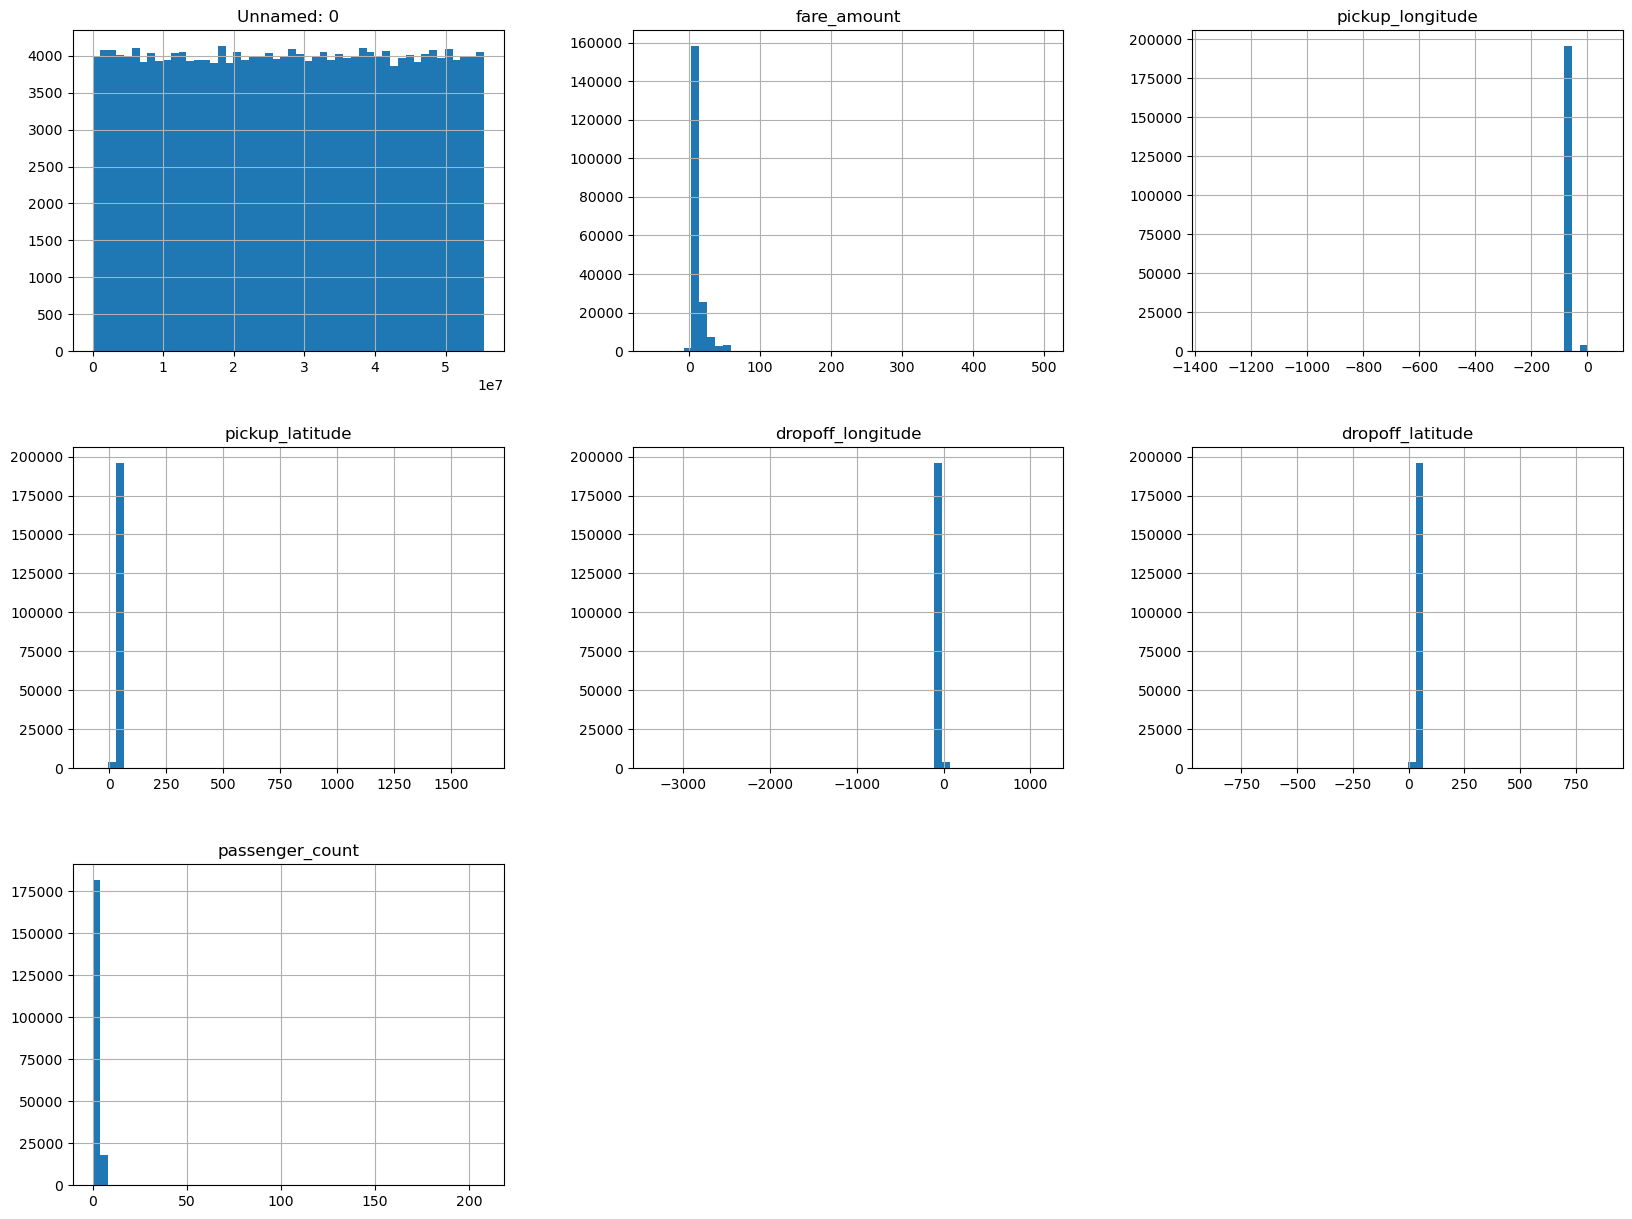

In [4]:
import matplotlib.pyplot as plt
uber_data.hist(bins=50, figsize=(20,15))
plt.show()


From above plot, only key attribute is random. Other attributes mostly in single classes. Now further explore locational data.

### Discover and Visualize data to gain insights

Here data is visualized through graphs to gain information about geographical attributes

[]

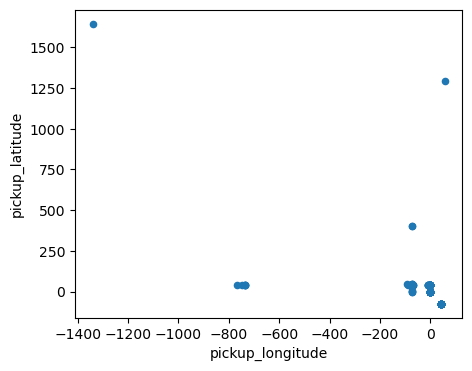

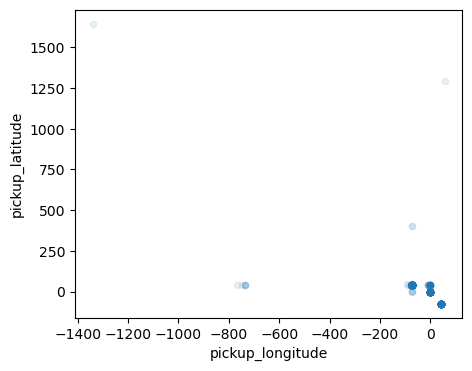

In [5]:
import matplotlib.pyplot as plt

# Plotting scatter graph between pickup_longitude and pickup_latitude

# Simple distribution shown
uber_data.plot( kind='scatter' , x ='pickup_longitude', y = 'pickup_latitude'  , figsize=(5,4))

# Distribution Shown, more darker means more frequency attain
uber_data.plot( kind='scatter' , x ='pickup_longitude', y = 'pickup_latitude'  , figsize=(5,4), alpha = 0.1)
plt.plot()

Now dropoff latitude and dropoff longitude graph

[]

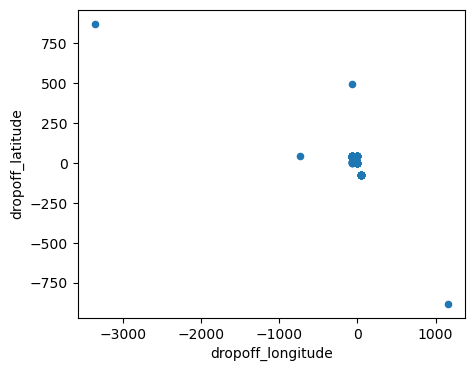

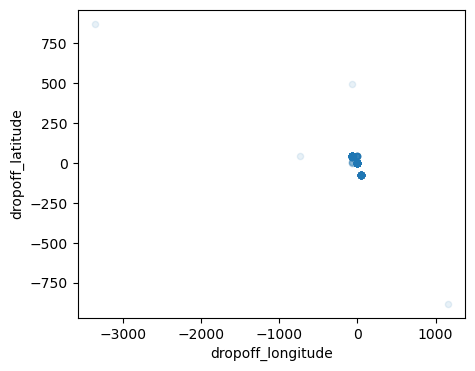

In [6]:
import matplotlib.pyplot as plt

# Plotting scatter graph between pickup_longitude and pickup_latitude

# Simple distribution shown
uber_data.plot( kind='scatter' , x ='dropoff_longitude', y = 'dropoff_latitude'  , figsize=(5,4))

# Distribution Shown, more darker means more frequency attain
uber_data.plot( kind='scatter' , x ='dropoff_longitude', y = 'dropoff_latitude'  , figsize=(5,4), alpha = 0.1)
plt.plot()

From here we can deduce the result that result is biased and few spaces are just used for piching up and dropping off. And dark spaces are those which are used many times.

### Looking for corelation

This dataset is not too large, so we can see the corelation of every attribute with all other attributes.

In [7]:
# Using Python Function corr()

corr_matrix = uber_data.corr()

In [8]:
corr_matrix['fare_amount'].sort_values(ascending = False)

fare_amount          1.000000
pickup_longitude     0.010457
passenger_count      0.010150
dropoff_longitude    0.008986
Unnamed: 0           0.000589
pickup_latitude     -0.008481
dropoff_latitude    -0.011014
Name: fare_amount, dtype: float64

Does not have strong corelation with any attribute.

### Experimenting with new attributes

Here in this dataset, we have total 9 fieds and out whatsof them 4 are locational attributes (pickup_longitude, pickup_latitude, dropoff_latitude, dropofflogitude. So if someone tries to make new field, then these attributes are combined to reprsent a single location.

## Preparing data for Machine Learning

### Data Cleaning

Now clean the data of above csv file. This step involves identifying and removing any missing, duplicate, or inconsistent data. This step is crucial as it can greatly impact the performance of the model.

In [9]:
uber_data.count()
#Implement model without data clening and observe results

Unnamed: 0           200000
key                  200000
fare_amount          200000
pickup_datetime      200000
pickup_longitude     200000
pickup_latitude      200000
dropoff_longitude    199999
dropoff_latitude     199999
passenger_count      200000
dtype: int64

As we can see above, we have one value missing in "dropoff_longitude" and "dropoff_latitude". 

Possible actions that could be done for this data cleaning are:
 - Remove rows containing null values
 - Replace with default values
 - Interpolation (Interpolation is a method of estimating missing values by filling in the gaps between known values. This method is useful when the missing values are not at random)
 - Imputation (Imputation is a method of estimating missing values by using statistical methods)
 - Ignore (only if missing values are small. It may generate error during training of model)

Let say we are removing row containing null value. As other methods are not best fit for our situation.

In [10]:
uber_data_drop = uber_data.dropna(how='any',axis=0) 

Now checking count of every attribute

In [11]:
uber_data_drop.count()

Unnamed: 0           199999
key                  199999
fare_amount          199999
pickup_datetime      199999
pickup_longitude     199999
pickup_latitude      199999
dropoff_longitude    199999
dropoff_latitude     199999
passenger_count      199999
dtype: int64

We have successfully removed the row that contain null value.

Or this may be done by putting 0 as a defalt value.

In [12]:
uber_data_defalt = uber_data.fillna(0)

In [13]:
uber_data_defalt.count()

Unnamed: 0           200000
key                  200000
fare_amount          200000
pickup_datetime      200000
pickup_longitude     200000
pickup_latitude      200000
dropoff_longitude    200000
dropoff_latitude     200000
passenger_count      200000
dtype: int64

We have replaced null values with 0 as a defalt value.

In [14]:
uber_data_defalt.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.524929,39.923691,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.118377,6.795398,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


As our mostly data is locations. So describe does not give us much more information about our data.

> Now we have data in two forms. We would procede in both case (Removing null rows, Setting default values). But as it is a single row that is altered. It is highly minute in quantity as compared to total data quantity (200000). It does not affect alot on the performance of the model.

### Handling Text and Catagorical Attributes

Text handling is an important part before delivering data to model to train. Most of the models does work on strings. They need numaric data for processing. So for this string to numaric converiosn, two methods are proposed here.


- **Ordinal Encoding** (assigns a unique integer value to each category in a categorical variable.)
- **One Hot Encoding** (creates new binary columns for each unique category in a categorical variable. Each observation is represented by a 1 in the column corresponding to its category and 0s in all other columns.)

Both thses encoding are not applied to our dataset. Because our dataset does not contain any string data.

### Custom Transformers

Custom transformers are user-defined classes that perform a specific transformation on the data. These classes can be used to perform custom preprocessing steps that are not provided by the libraries.

Custom transformr for geting data filling with 0 as a default value could get through the following code:

In [15]:
from sklearn.base import TransformerMixin, BaseEstimator


class Remove_Null_Transformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass
    
    def transform(self, data):
        return data.fillna(0)

In [16]:
trans = Remove_Null_Transformer()

uber = trans.transform(uber_data)
uber.count()

Unnamed: 0           200000
key                  200000
fare_amount          200000
pickup_datetime      200000
pickup_longitude     200000
pickup_latitude      200000
dropoff_longitude    200000
dropoff_latitude     200000
passenger_count      200000
dtype: int64

### Feature Scaling

Feature scaling is the process to Normalize or Standardize the scatter data to some small range (like 0 to 1) or standardize the data so that is has mean equals to zero. Here we have two options: 

 - **Normalization** ( Normalization is the process of transforming the data to a specific range, typically between 0 and 1.)
 - **Standardization** ( Standardization is the process of transforming the data to have a mean of zero and a standard deviation of one.)

### Splitting Data for Training and Testing

In [17]:
#from sklearn.model_selection import StratifiedShuffleSplit

X = uber_data_defalt[uber_data_defalt.columns.difference(['fare_amount', 'key', 'pickup_datetime'])]
Y = uber_data_defalt['fare_amount']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)



## Select the model and train it

Here we have three options of model:
- Linear Regression
- Decision Tree
- Forest Regression

In [47]:
# Using Linear Regression
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_train , y_train)


LinearRegression()

In [48]:
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]

In [49]:
print("Predictions : ", lin_reg.predict(some_data))
print("Labels : ", some_labels)


Predictions :  [11.37726097 11.59220209 11.45222311 11.31350001 11.30324508]
Labels :  171942    21.0
143307    11.7
181151    10.0
68687      7.3
36574      6.5
Name: fare_amount, dtype: float64


In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np


uber_prediction = lin_reg.predict(some_data)
lin_mse = mean_squared_error(some_labels, uber_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.174882114276875

##### Now by using Decision Tree

In [23]:
# Using Decision Tree
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train , y_train)

DecisionTreeRegressor()

In [24]:
print("Predictions : ", tree_reg.predict(some_data))
print("Labels : ", some_labels)

Predictions :  [21.  11.7 10.   7.3  6.5]
Labels :  171942    21.0
143307    11.7
181151    10.0
68687      7.3
36574      6.5
Name: fare_amount, dtype: float64


In [25]:
uber_prediction = tree_reg.predict(some_data)
lin_mse = mean_squared_error(some_labels, uber_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

##### Now Applying Random Forest Regression Model

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train , y_train)

RandomForestRegressor()

In [27]:
print("Predictions : ", forest_reg.predict(some_data))
print("Labels : ", some_labels)

Predictions :  [22.054 11.324 10.031  7.124  6.375]
Labels :  171942    21.0
143307    11.7
181151    10.0
68687      7.3
36574      6.5
Name: fare_amount, dtype: float64


In [28]:
uber_prediction = forest_reg.predict(some_data)
lin_mse = mean_squared_error(some_labels, uber_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.5098733175995741

### Cross Validation

In [32]:
def display_scores(scores):
	print("Scores:", scores)
	print("Mean:", scores.mean())
	print("Standard deviation:", scores.std())


##### For Linear Regression Model

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_train , y_train , scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

lin_rmse_scores

array([ 9.71076749, 10.23772815, 10.18114918,  9.99769278,  9.81671845])

In [34]:
display_scores(scores)

Scores: [ -94.85504137  -93.74886806 -113.69317095  -95.94002231 -100.06022415
 -107.25023955 -102.35015546  -97.56935933  -99.68950217  -93.04269569]
Mean: -99.81992790334664
Standard deviation: 6.178273846404306


##### For Decision Tree

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train , y_train , scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

lin_rmse_scores

array([6.67561442, 7.53605464, 7.46678909, 7.69588127, 6.77392604,
       6.57232911, 6.63245987, 7.65950152, 6.26232806, 6.35706671])

In [36]:
display_scores(scores)

Scores: [-44.56382789 -56.79211947 -55.75293932 -59.22658851 -45.88607394
 -43.19550995 -43.98952395 -58.66796349 -39.21675271 -40.41229719]
Mean: -48.770359642500004
Standard deviation: 7.493185567388135


##### For Random Forest

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, X_train , y_train , scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

lin_rmse_scores

array([4.6857882 , 4.87264652, 6.27788647, 4.75173962, 5.31589047,
       4.86262507, 5.38566259, 5.06974486, 4.68662323, 4.48379773])

In [38]:
display_scores(scores)

Scores: [-21.95661107 -23.74268411 -39.41185848 -22.57902941 -28.2586915
 -23.64512256 -29.00536149 -25.70231294 -21.96443732 -20.10444207]
Mean: -25.637055095663186
Standard deviation: 5.315256217298379


From the above results, we can deduce that best model is Random Forest uptil now

## Fine Tune your model

Its time to tune your model before opening test set to the model

### Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

for_reg = RandomForestRegressor()
grid_search = GridSearchCV(for_reg, param_grid, cv=5,
 	scoring='neg_mean_squared_error',
	return_train_score=True)
grid_search.fit(X_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\jo

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

## Evaluate your system on test set

#### Evaluation Score of Linear Regression Model

In [52]:
print("Training set score: {:.2f}".format(lin_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(lin_reg.score(X_test, y_test)))

Training set score: 0.00
Test set score: -0.0002556


#### Evaluation score of Decision tree

In [46]:
print("Training set score: {:.2f}".format(tree_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(tree_reg.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.4442256


#### Evaluation Score of Random Forest

In [53]:
print("Training set score: {:.2f}".format(forest_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(forest_reg.score(X_test, y_test)))

Training set score: 0.96
Test set score: 0.7450241


##### Now Apply on Test Set Tree Regression Model

In [ ]:
uber_prediction = tree_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, uber_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

##### For Linear Regression Test Set

In [ ]:
uber_prediction = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, uber_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
uber_data_without_0 = uber_data[(uber_data.pickup_longitude != 0) & (uber_data.pickup_latitude != 0) & (uber_data.dropoff_longitude != 0) & (uber_data.dropoff_latitude != 0)] 

In [ ]:
(uber_data_without_0.pickup_longitude).isin([0]).any()

In [ ]:
column_name = 'fare_amount'
max_value = max(uber_data_without_0[column_name])
min_value = min(uber_data_without_0[column_name])

print(column_name, min_value, max_value)
for i in range(int(min_value) , int(max_value)+1):
    print(i, (uber_data_without_0[uber_data_without_0[column_name] == i]).count()[0])




#(uber_data_without_0[uber_data_without_0.fare_amount == 10]).count()[0]

In [ ]:
uber_data_without_0.plot( kind='scatter' , x ='dropoff_longitude', y = 'dropoff_latitude'  , figsize=(5,4))
plt.plot()

In [ ]:
#len(uber_data_without_0.dropoff_longitude.unique())

columns = uber_data_without_0.columns

for i in columns:
    print(i, len(uber_data_without_0[i].unique()))


In [ ]:
200000- 76827

In [ ]:
uber_data_non_duplicates = uber_data.drop_duplicates()

In [ ]:
len(uber_data_non_duplicates)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(uber_data, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import tree

In [ ]:
x_train = train[train.columns.difference(['pickup_datetime'])]
y_train = train['fare_amount']

x_test = test[test.columns.difference(['fare_amount'])]
y_test = test[test.columns.difference(['fare_amount'])]

In [ ]:
x_train